# Classify images Social Distancing and Violate 

# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
tf.__version__

'2.2.0'

In [3]:
tf.test.is_gpu_available(
    cuda_only=True, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

In [5]:
import torch

#checking for device
device = torch.device('cuda' 
                    if torch.cuda.is_available() 
                    else 'cpu')

print(device)

cpu


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [7]:
train_datagen

In [8]:
training_set = train_datagen.flow_from_directory('Images/training_set',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 52 images belonging to 2 classes.


In [9]:
training_set

In [10]:
training_set.class_indices

{'No_Social_Distancing': 0, 'Social_Distancing': 1}

### Preprocessing the Test set

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
test_datagen

In [13]:
test_set = test_datagen.flow_from_directory('Images/test_set',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10 images belonging to 2 classes.


In [14]:
test_set

## Part 2 - Building the CNN

### Initialising the CNN

In [15]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))

### Step 2 - Pooling

In [17]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [19]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [20]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [21]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [22]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [23]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
2/2 [==============================] - 1s 447ms/step - loss: 1.2243 - accuracy: 0.5385 - val_loss: 1.2100 - val_accuracy: 0.5000
Epoch 2/25
2/2 [==============================] - 2s 900ms/step - loss: 1.0309 - accuracy: 0.5000 - val_loss: 0.6139 - val_accuracy: 0.8000
Epoch 3/25
2/2 [==============================] - 1s 612ms/step - loss: 0.6826 - accuracy: 0.5769 - val_loss: 0.6303 - val_accuracy: 0.5000
Epoch 4/25
2/2 [==============================] - 1s 550ms/step - loss: 0.6820 - accuracy: 0.6346 - val_loss: 0.5520 - val_accuracy: 0.7000
Epoch 5/25
2/2 [==============================] - 1s 339ms/step - loss: 0.6050 - accuracy: 0.6346 - val_loss: 0.5379 - val_accuracy: 0.6000
Epoch 6/25
2/2 [==============================] - 1s 316ms/step - loss: 0.5662 - accuracy: 0.7500 - val_loss: 0.4170 - val_accuracy: 0.9000
Epoch 7/25
2/2 [==============================] - 1s 272ms/step - loss: 0.5109 - accuracy: 0.8269 - val_loss: 0.3409 - val_accuracy: 0.9000
Epoch 8/25
2/2 [====

## Part 4 - Making a single prediction

In [24]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

0.0
{'No_Social_Distancing': 0, 'Social_Distancing': 1}


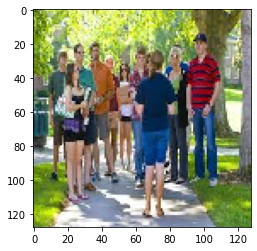

In [25]:

test_image = image.load_img('Images/single_prediction/ab (1).jpg', target_size = (128, 128))
image_data = image.img_to_array(test_image)
exp_img = np.expand_dims(image_data , axis = 0)

plt.imshow(test_image)

result = cnn.predict(exp_img)
print(result[0][0])
print( training_set.class_indices)

if result[0][0] == 0:
    prediction = 'No'
else:
    prediction = 'Yes'

In [26]:
prediction

'No'

1.0
{'No_Social_Distancing': 0, 'Social_Distancing': 1}


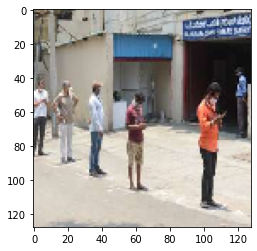

In [27]:
test_image2 = image.load_img('Images/single_prediction/ab (2).jpg', target_size = (128, 128))
image_data2 = image.img_to_array(test_image2)
exp_img2 = np.expand_dims(image_data2, axis = 0)

plt.imshow(test_image2)

result = cnn.predict(exp_img2)
print(result[0][0])
print( training_set.class_indices)

if result[0][0] == 0:
    prediction = 'No'
else:
    prediction = 'Yes'

In [28]:
print(prediction)

Yes


0.0
{'No_Social_Distancing': 0, 'Social_Distancing': 1}


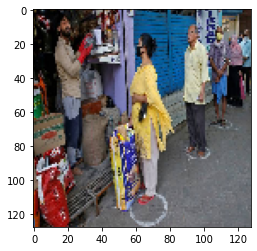

In [29]:
test_image3 = image.load_img('Images/single_prediction/a (1).jpg', target_size = (128, 128))

image_data3 = image.img_to_array(test_image3)
exp_img3 = np.expand_dims(image_data3, axis = 0)

plt.imshow(test_image3)

result = cnn.predict(exp_img3)
print(result[0][0])
print( training_set.class_indices)
if result[0][0] == 0:
    prediction = 'No'
else:
    prediction = 'Yes'

In [30]:
print(prediction)

No


0.0
{'No_Social_Distancing': 0, 'Social_Distancing': 1}


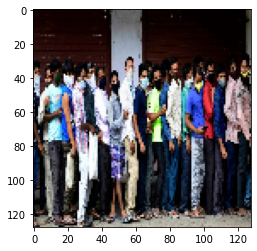

In [31]:
test_image4 = image.load_img('Images/single_prediction/a (2).jpg', target_size = (128, 128))

image_data4 = image.img_to_array(test_image4)
exp_img4 = np.expand_dims(image_data4, axis = 0)

plt.imshow(test_image4)

result = cnn.predict(exp_img4)
print(result[0][0])
print( training_set.class_indices)

if result[0][0] == 0:
    prediction = 'No'
else:
    prediction = 'Yes'

In [32]:
print(prediction)

No


# Accuracy: 0.92